#Assignment 04: Deep Learning Algorithms 

This Week's assignment is to train Deep Learning and Machine Learning algorithms on the `fashion_mnist` images dataset to accurately predict the type of clothes in the image.

Before starting copy this file and work on your own copy by following the below steps: 
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 04: Deep Learning - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/10/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the machine learning project.
2. Download the dataset using `tf.keras.datasets`.
3. Make sure the pixels values are scaled between (`0-1`).
4. Make sure to convert the target into one hot vector.
5. Train six different Machine Learning models (`KNN`, `Logistics Regression`, `Support Vector Machine`, `Decision Tree`, `Random Forest`, `DNN`).


6. Make sure to achieve the following results for the testing data:
<br> Accuracy equal or above "95%", and Loss equal or below "0.1". 
7. Plot the loss and validation loss values from the training history of the DNN model.
8. Use the right evaluation metrics to choose the best model (write down your choice of the best model).


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model.

Find relevant links below:

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLScPUIMjrlCk9Px0ioSE9xLViJO9r-Q1EymwXxXcJmQuHmIEHA/viewform?usp=pp_url)

Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the machine learning project.

In [67]:
# import the necessary libraries
from sklearn import metrics,model_selection,preprocessing,neighbors,linear_model,tree,svm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


# 2- Download the dataset using tf.keras.dataset

In [68]:
# download the required dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

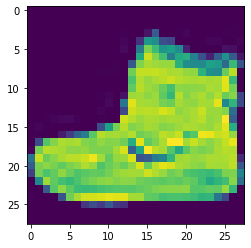

In [69]:
# plot image samples from the dataset 
plt.imshow(x_train[0])

In [70]:
# check the shape of the following (x_train, y_train and x_test, y_test)
print('shape of x_train:', x_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:', y_test.shape)

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

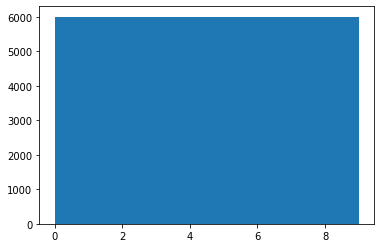

In [71]:
# plot the histogram of the target from the training and testing distribution 
plt.hist(y_train)

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

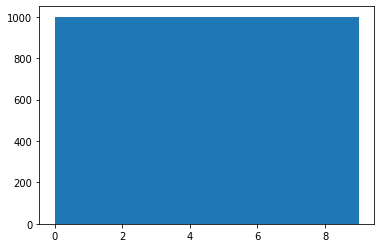

In [72]:
plt.hist(y_test)

In [73]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# 3- Make sure the pixels values are scaled between (0-1)

In [74]:
# scale the pixels values between 0-1
x_train=x_train/255.0
x_test=x_test/255.0

In [75]:
# convert the images into vectors
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)
print('shape of x_train:', x_train.shape)
print('shape of x_test:',x_test.shape)


shape of x_train: (60000, 784)
shape of x_test: (10000, 784)


# 4- Make sure to convert the target into one hot vector

In [76]:
# encode the training and testing target into one hot vector
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))

In [77]:
print('y_train_hot:', y_train_hot)
print('y_test_hot:', y_test_hot)

y_train_hot: tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 10), dtype=float32)
y_test_hot: tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 10), dtype=float32)


# 5- Modeling
Train six different models (KNN, Logistics Regression, Support Vector Machine, Decision Tree, Random Forest, DNN)


**Note:**
1. Make sure to saperate each model in a new sub-section.
2. Make sure to achieve the following results for the testing data: 
<br> Accuracy equal or above "95%", and Loss equal or below "0.1".
3. Plot the loss and validation loss values from the training history of the DNN model.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

##KNN

In [ ]:
# Create Decision KNN classifer
model_1=neighbors.KNeighborsClassifier(n_neighbors=3)
# Train Decision KNN Classifer
model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Predict the response for test dataset
y_pred=model_1.predict(x_test)

###testing

accuracy_score : 0.8541
Precision Score: 0.8575414622679564
Recall Score: 0.8541


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


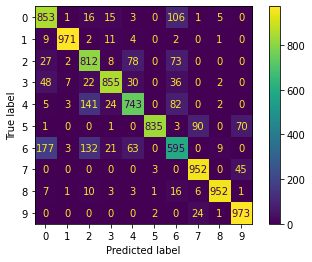

In [ ]:
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)
metrics.plot_confusion_matrix(model_1,x_test,y_test)#plot confusion matrix

##Logistics Regression

In [ ]:
# Create Decision logistics regression classifer
model_2=linear_model.LogisticRegression(C=10, solver='sag')
# Train Decision logistics regression Classifer
model_2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=10, solver='sag')

In [ ]:
#predict output
y_pred=model_2.predict(x_test)

###testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy_score : 0.8418
Precision Score: 0.8405665326195257
Recall Score: 0.8418


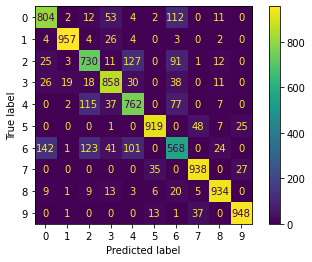

In [ ]:
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)
#plot confusion matrix
metrics.plot_confusion_matrix(model_2,x_test,y_test)

##Support Vector Machine

In [91]:
# Create SVC classifer
svc_1=svm.SVC(C=10,kernel='rbf',gamma='scale')
# Train SVC Classifer
svc_1.fit(x_train,y_train)
#Predict the response for test dataset
y_pred=svc_1.predict(x_test)

###testing

accuracy_score : 0.9002
Precision Score: 0.9001435076840276
Recall Score: 0.9002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


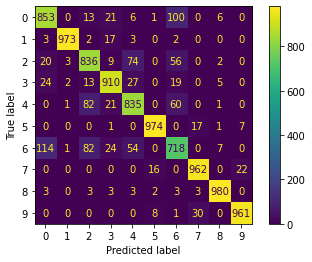

In [92]:
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)
#plot confusion matrix
metrics.plot_confusion_matrix(svc_1,x_test,y_test)

##Decision Tree

In [ ]:
# Create Decision Tree classifer 
model_4 = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
model_4.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predict the response for test dataset
y_pred=model_4.predict(x_test)

###testing

In [ ]:
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)

accuracy_score : 0.7883
Precision Score: 0.7901032890295943
Recall Score: 0.7883


##Random Forest

In [ ]:
#Create a Gaussian Classifier
model_5=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets 
model_5.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model_5.predict(x_test)

###testing

In [ ]:
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)

accuracy_score : 0.7883
Precision Score: 0.7901032890295943
Recall Score: 0.7883


## DNN Model

In [78]:
from keras.backend import dropout
tf.keras.backend.clear_session()

class Subclass(tf.keras.layers.Layer):

  def __init__(self,unit_lis=[],dropout_lis=[],**kwargs):
    super(Subclass,self).__init__(**kwargs)
    self.dense_1 = tf.keras.layers.Dense(units=unit_lis[0],kernel_initializer=tf.initializers.he_uniform(seed=42))
    self.dropout_1 = tf.keras.layers.Dropout(dropout_lis[0])
    self.dense_2 = tf.keras.layers.Dense(units=unit_lis[1],kernel_initializer=tf.initializers.he_uniform(seed=42))
    self.dropout_2 = tf.keras.layers.Dropout(dropout_lis[1])
  

  
   

  def call(self,inputs):
    dense1=tf.nn.leaky_relu (self.dense_1(inputs))
    dropout1=self.dropout_1(dense1) 
    dense2=tf.nn.leaky_relu (self.dense_2(dropout1))
    dropout2=self.dropout_2(dense2)
   
  

    output=tf.keras.layers.concatenate([dropout2,inputs])
    return output

class Deepsubclass(tf.keras.Model):

  def __init__(self):
    super(Deepsubclass,self).__init__()

    self.block_1=Subclass(unit_lis=[64,128],dropout_lis=[0.2,0.3],name='block_1')
    #self.block_2=Subclass(unit_lis=[128,256],dropout_lis=[0.1,0.2],name='block_2')
    

    self.out=tf.keras.layers.Dense(10,name='out')

  def call(self,input):
        x=self.block_1(input)
        #x=self.block_2(x)
        x=self.out(x)
        x=tf.nn.softmax(x)
        return x

model=Deepsubclass()
model.build((None,784))       






In [79]:
model.summary()

Model: "deepsubclass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block_1 (Subclass)          multiple                  58560     
                                                                 
 out (Dense)                 multiple                  9130      
                                                                 
Total params: 67,690
Trainable params: 67,690
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(optimizer= tf.optimizers.Adam(),loss = tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [81]:
model.fit(x=x_train,y=y_train_hot,epochs= 40, batch_size=32,validation_data=(x_test,y_test_hot))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5345 - acc: 0.8107 - val_loss: 0.4724 - val_acc: 0.8290
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4130 - acc: 0.8520 - val_loss: 0.4389 - val_acc: 0.8391
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3850 - acc: 0.8612 - val_loss: 0.3850 - val_acc: 0.8604
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3685 - acc: 0.8677 - val_loss: 0.4071 - val_acc: 0.8536
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3573 - acc: 0.8704 - val_loss: 0.3957 - val_acc: 0.8571
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3517 - acc: 0.8726 - val_loss: 0.3800 - val_acc: 0.8625
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3404 - acc: 0.8765 - val_loss: 0.3796 - val_acc: 0.8628
Epoch 8/40
1875/1875 [==============================] - 5s 3ms

### Model evaluation

In [ ]:
#the best model is SVM 
#acc is 90%